### make training data

In [4]:
import numpy as np
import pickle as pkl
import os

keti = '/users/neuron2/KSL_Gen/data/subset_annotation_norm.pkl'
split = '/users/neuron2/KSL_Gen/data/subset_split_save_norm.pkl'
mydata = '/users/neuron2/Kinetic-GAN/data/KETI'

In [2]:
with open(keti, 'rb') as f:
    ksl = pkl.load(f)

anno = ksl['annotations']
anno[0]

{'frame_dir': 'KETI_SL_0000035213.mp4.npy',
 'label': 6,
 'img_shape': (1080, 1920),
 'original_shape': (1080, 1920),
 'total_frames': 129,
 'num_person_raw': 1,
 'keypoint': array([[[[0.5541886 , 0.0020763 ],
          [0.7853971 , 0.27308825],
          [0.13257284, 0.2900264 ],
          ...,
          [0.1107623 , 0.9849572 ],
          [0.00970972, 0.9849572 ],
          [0.00970972, 0.9849572 ]],
 
         [[0.5500937 , 0.00311194],
          [0.7948157 , 0.27402726],
          [0.12862809, 0.2909596 ],
          ...,
          [0.13468854, 0.98559946],
          [0.        , 0.98559946],
          [0.0336718 , 0.98559946]],
 
         [[0.55526257, 0.00163668],
          [0.7865817 , 0.2727781 ],
          [0.13344564, 0.28972438],
          ...,
          [0.11289147, 0.9850299 ],
          [0.01179088, 0.9850299 ],
          [0.01179088, 0.9850299 ]],
 
         ...,
 
         [[0.57207954, 0.00690847],
          [0.80348814, 0.2696783 ],
          [0.15009902, 0.2951076 ],


In [ ]:
training = ksl['split']['train']
testing = ksl['split']['test']

In [ ]:
with open(split, 'rb') as f:
    spl = pkl.load(f)

In [ ]:
traind=spl['train']
testd=spl['test']

In [ ]:
trainSet = []
trainName = []
trainLabel = []
for t, l in zip(traind, training):
    kp = t['keypoint']
    kp = np.transpose(kp, (2, 0, 1))
    kp = np.expand_dims(kp, axis=-1)
    trainSet.append(kp)

    trainName.append(l)
    trainLabel.append(t['label'])

trainSet = np.array(trainSet)
trainMeta = tuple([trainName, trainLabel])

In [ ]:
testSet = []
testName = []
testLabel = []
for t, l in zip(testd, testing):
    kp = t['keypoint']
    kp = np.transpose(kp, (2, 0, 1))
    kp = np.expand_dims(kp, axis=-1)
    testSet.append(kp)

    testName.append(l)
    testLabel.append(t['label'])

testSet = np.array(testSet)
testMeta = tuple([testName, testLabel])

In [ ]:
np.save(os.path.join(mydata, 'train_data.npy'), trainSet)
np.save(os.path.join(mydata, 'test_data.npy'), testSet)

In [ ]:
with open(os.path.join(mydata, 'train_label.pkl'), 'wb') as f:
    pkl.dump(trainMeta, f)

with open(os.path.join(mydata, 'test_label.pkl'), 'wb') as f:
    pkl.dump(testMeta, f)

### check synthetic data

In [5]:
rpath = '/users/neuron2/Kinetic-GAN/data/KETI/train_data.npy'
rlabel = '/users/neuron2/Kinetic-GAN/data/KETI/train_label.pkl'

In [6]:
path = 'runs/kinetic-gan/exp2/actions/10_1_trunc0.95_gen_data.npy'
label = 'runs/kinetic-gan/exp2/actions/10_1_trunc0.95_gen_label.pkl'

In [7]:
data = np.load(path)

with open(label, 'rb') as f:
    label = pkl.load(f)

In [12]:
rnpy = np.load(rpath)

with open(rlabel, 'rb') as f:
    rclass = pkl.load(f)

In [4]:
data.shape

(100, 2, 109, 27, 1)

In [5]:
label

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
        2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
        4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
        6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7,
        8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
        2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
        4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
        6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7,
        8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [6]:
sample = data[0]
sample.shape

(2, 109, 27, 1)

In [7]:
x = sample[0]
y = sample[1]
x = x.squeeze()
y = y.squeeze()

#### Draw skeleton with bone and joint

In [8]:
limb_info = [(0,1),(1,3),(3,5), (0,2),(2,4),(4,6), 
             (5,7),(6,17),
             (7,8),(7,9),(9,10),(7,11),(11,12),(7,13),(13,14),(7,15),(15,16), 
             (17,18),(17,19),(19,20),(17,21),(21,22),(21,23),(23,24),(17,25),(25,26)]

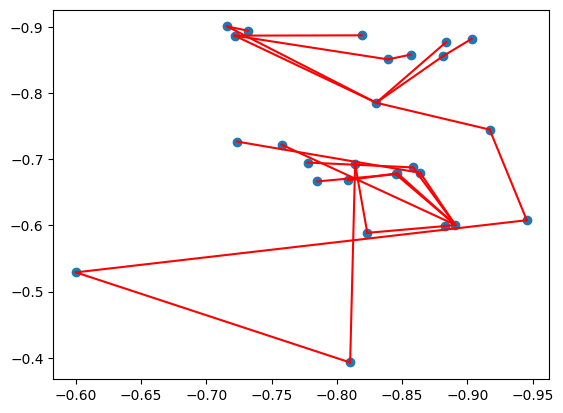

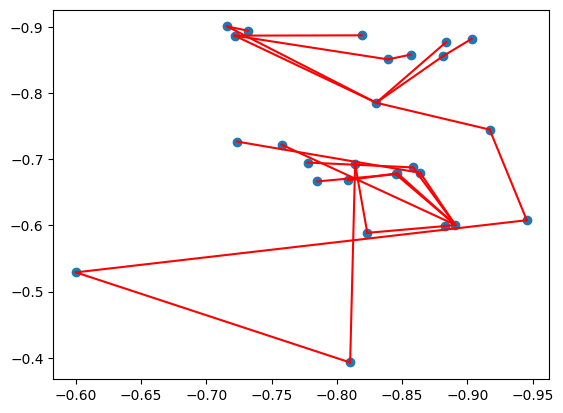

In [10]:
import matplotlib.pyplot as plt
from IPython import display

for xc, yc in zip(x, y):

    for l in limb_info:
        x1 = xc[l[0]]
        x2 = xc[l[1]]
        y1 = yc[l[0]]
        y2 = yc[l[1]]
        plt.plot([x1, x2], [y1, y2], color="red")
       
    plt.scatter(xc, yc)
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.show()

In [9]:
data.shape, label.shape

((100, 2, 109, 27, 1), (2, 100))

In [16]:
rnpy.shape

(560, 2, 109, 27, 1)

In [33]:
score = np.zeros((1, 109, 27, 1))
score.shape

(1, 109, 27, 1)

In [39]:
fake = []
for d in data:
    fake.append(np.concatenate((d, score), axis=0))

fake = np.array(fake)
fake.shape

(100, 3, 109, 27, 1)

In [40]:
real = []
for r in rnpy:
    real.append(np.concatenate((r, score), axis=0))

real = np.array(real)
real.shape

(560, 3, 109, 27, 1)

In [41]:
np.save('/users/neuron2/Kinetic-GAN/data/KETI/metric/real.npy', real)
np.save('/users/neuron2/Kinetic-GAN/data/KETI/metric/fake.npy', fake)

### evaluate KETI training with FID score

In [1]:
!python evaluation/fid-actions.py data/KETI/metric/real.npy data/KETI/train_label.pkl data/KETI/metric/fake.npy runs/kinetic-gan/exp2/actions/10_1_trunc0.95_gen_label.pkl

Namespace(batch_size=16, dataset='keti', device='cuda:0', dims=2048, path=['data/KETI/metric/real.npy', 'data/KETI/train_label.pkl', 'data/KETI/metric/fake.npy', 'runs/kinetic-gan/exp2/actions/10_1_trunc0.95_gen_label.pkl'], t_size=64)
block_idx 3
/home/neuron2/anaconda3/envs/kineGAN/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/home/neuron2/anaconda3/envs/kineGAN/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
(560, 3, 109, 27, 1)
None
560
100%|███████████████████████████████████████████| 35/35 [00:01<00:00, 26.74it/s]

### train loss plot

In [2]:
import matplotlib.pyplot as plt
import scipy.io

mat_file_name =  "/users/neuron2/Kinetic-GAN/runs/kinetic-gan/exp2/plot_loss.mat"
mat_file = scipy.io.loadmat(mat_file_name)

/home/neuron2/anaconda3/envs/kineGAN/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/neuron2/anaconda3/envs/kineGAN/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
print(type(mat_file))
for i in mat_file:
    print(i)

<class 'dict'>
__header__
__version__
__globals__
d_loss
g_loss


In [14]:
d_loss = mat_file['d_loss']
g_loss = mat_file['g_loss']
g_loss.shape, d_loss.shape

((1, 20400), (1, 20400))

In [15]:
xmin = 0
ymin = min(min(d_loss[0]), min(g_loss[0]))
ymax = max(max(d_loss[0]), max(g_loss[0]))
ymin,ymax

(-201.69876, 107.351326)

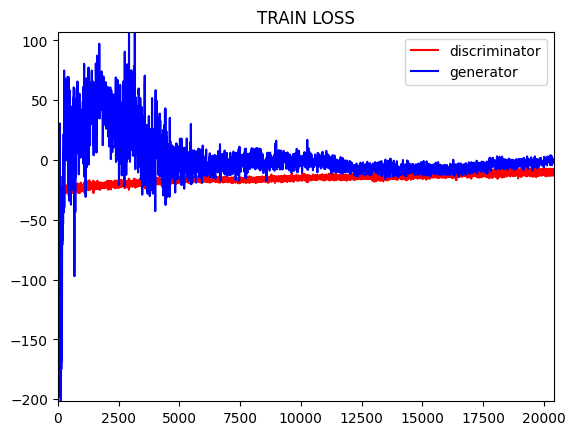

In [17]:
plt.title("TRAIN LOSS")
plt.axis([0, 20400, ymin, ymax])
plt.plot(d_loss[0], label="discriminator", color='red')
plt.plot(g_loss[0], label="generator", color="blue")
plt.legend()
plt.show()